In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import nibabel as nib
import scipy.io as sio
from nilearn import plotting, image
from nilearn.image.image import mean_img
from nilearn.plotting.img_plotting import plot_epi, plot_roi

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
##parameter
#scales
scale = 7
#load basc map
in_vol=nib.load('/sandbox/home/Drive/HCP/subtypes_scores/26-10-2006/BASC_sci10_scg7_scf7_lr-rl/brain_partition_consensus_group_sci10_scg7_scf7.nii.gz')


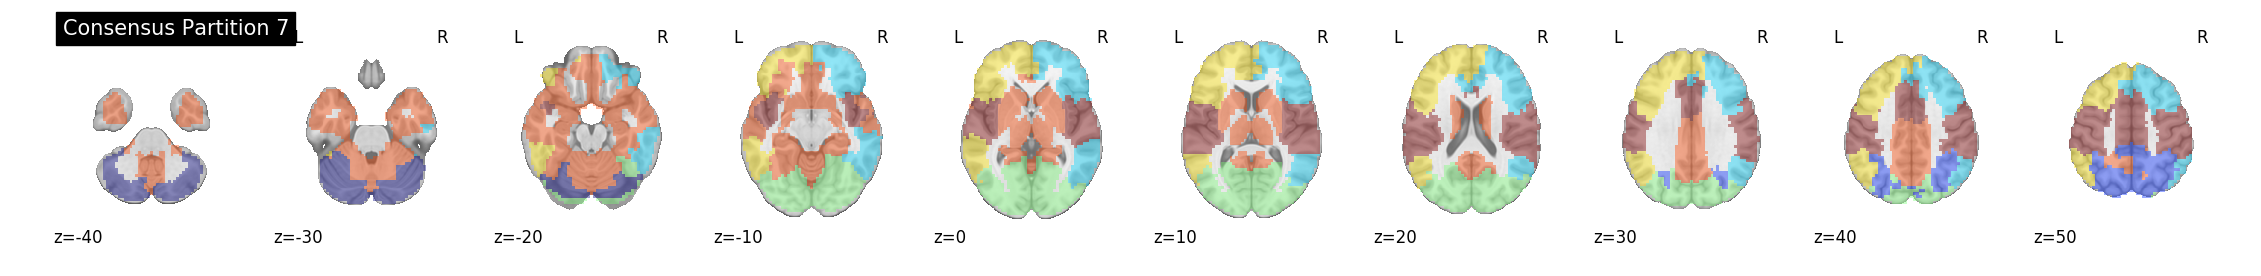

In [22]:
## Display partitions
display = plotting.plot_anat('/sandbox/home/Drive/HCP/subtypes_scores/26-10-2006/white_template.nii.gz',
                             colorbar=False,
                             title="Consensus Partition %i"%(scale),
                             display_mode='z',
                             cut_coords= range(-40, 60, 10) 
                             )


display.add_overlay(in_vol,cmap=cm.jet,alpha=0.4)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0


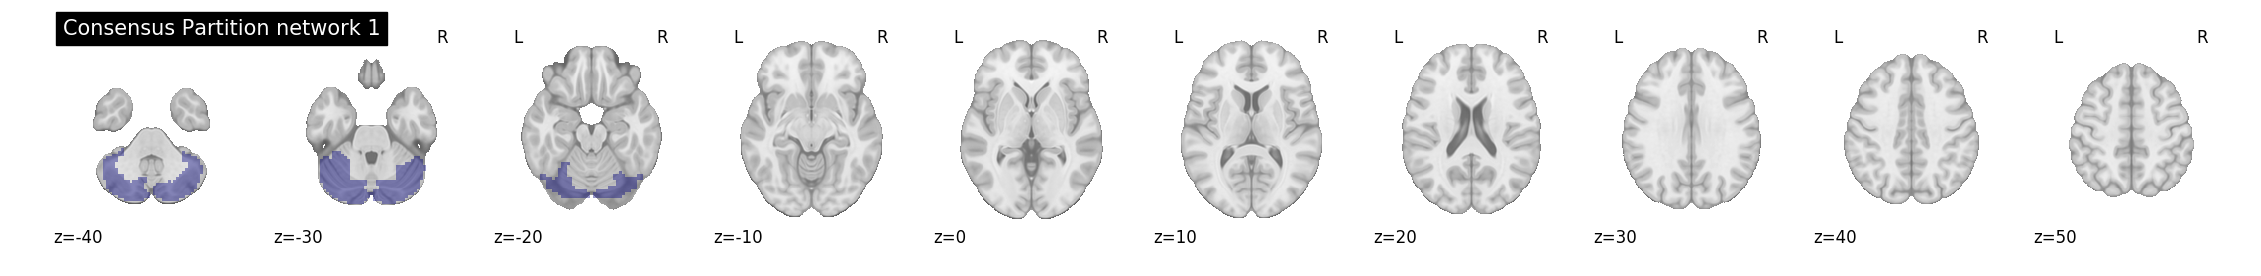

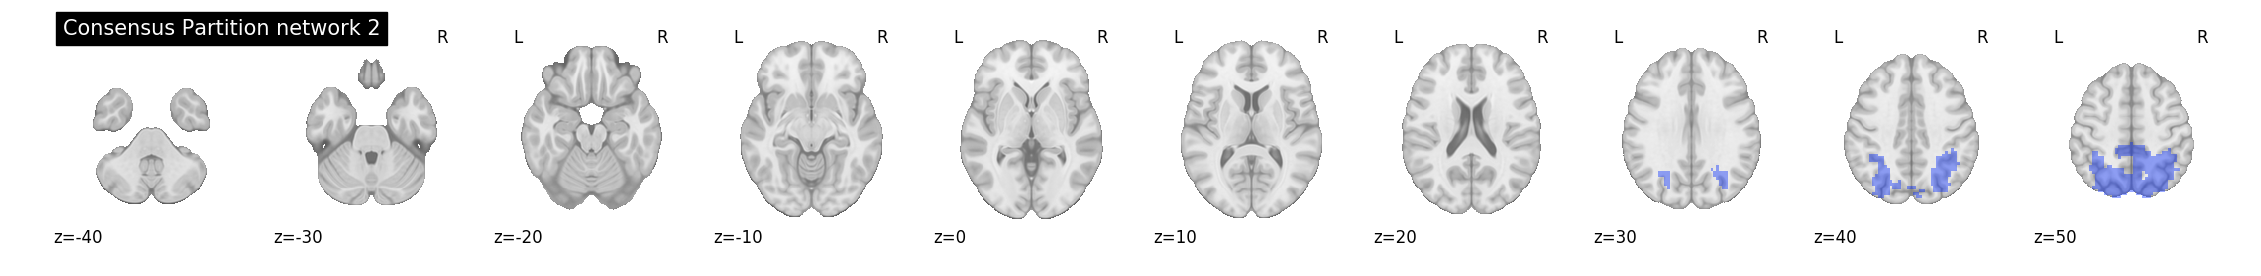

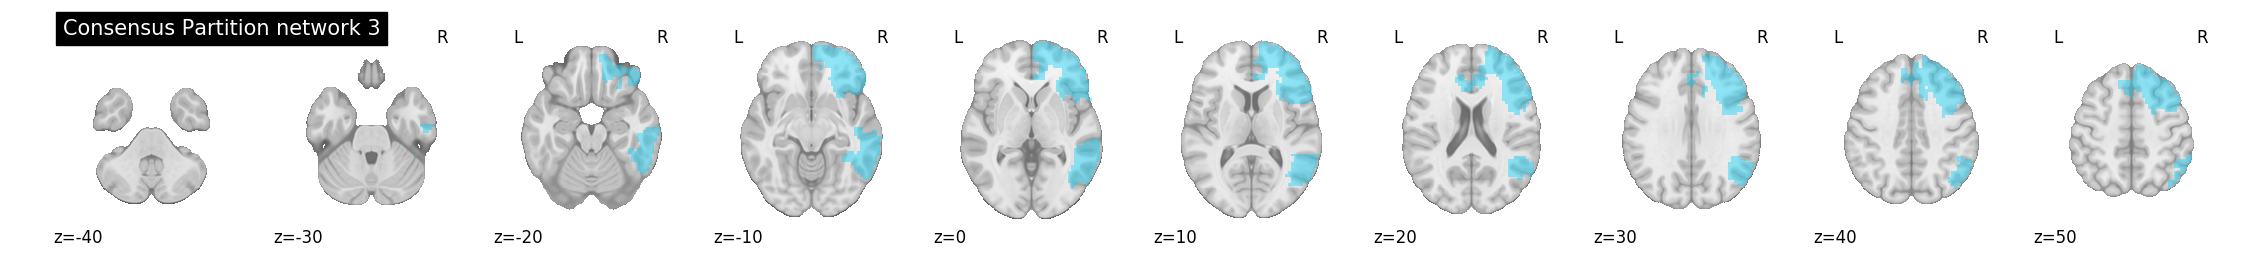

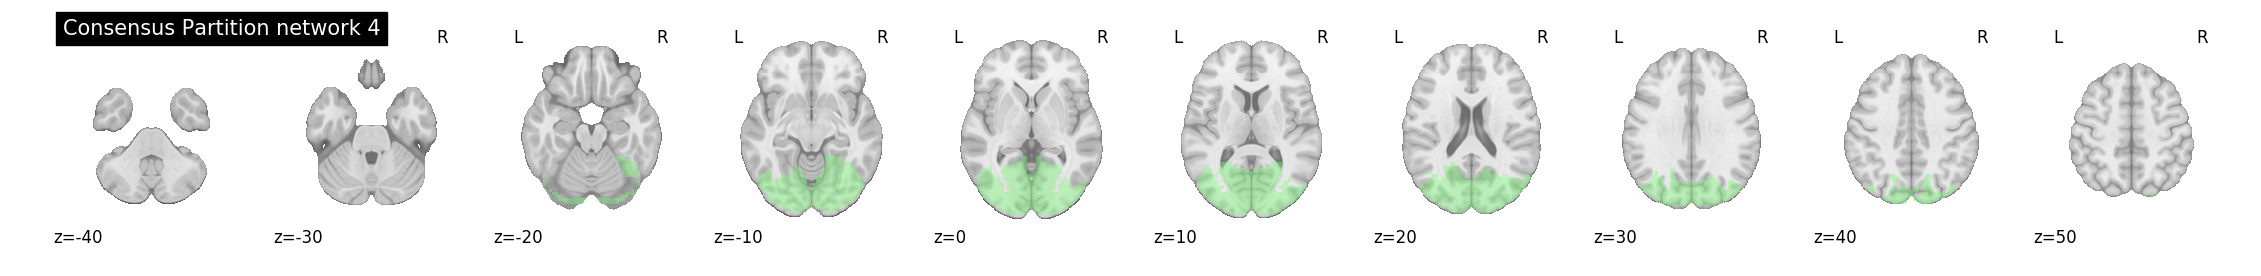

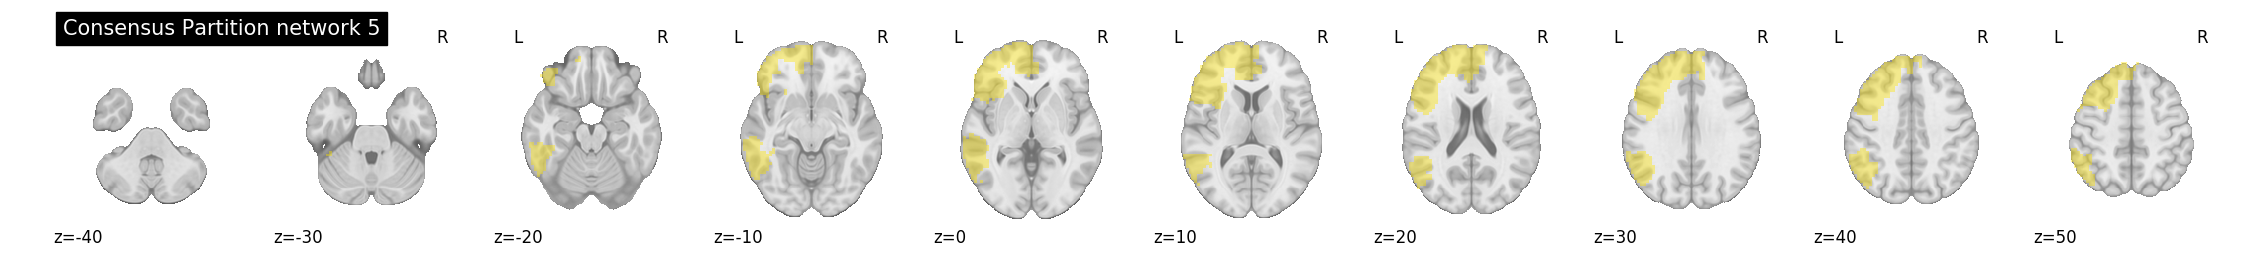

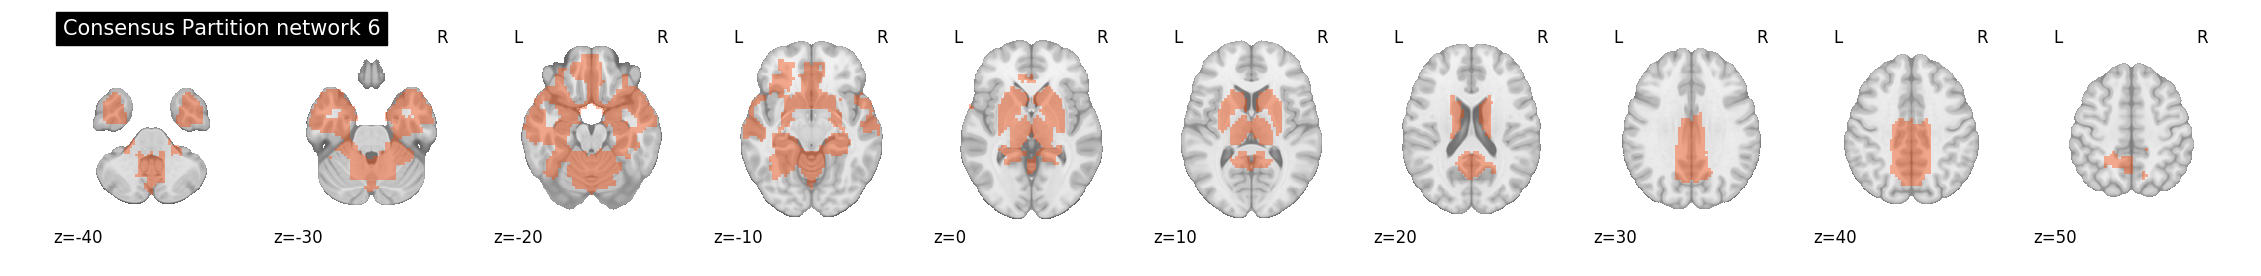

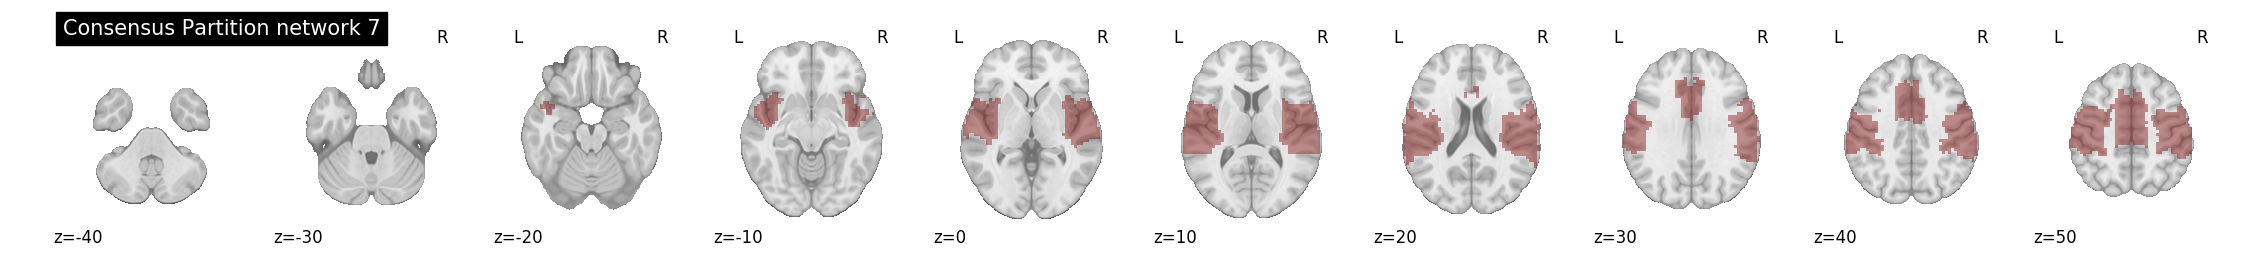

In [30]:
##display slected network
network = 7
data=in_vol.get_data()
value=np.unique(data[data!=0]) 
new_shape = data.shape + (np.max(value),)
output= np.zeros(new_shape)
for ind, val in enumerate(value):
    output[data==val,ind] = val
out_image = nib.Nifti1Image(output, affine=in_vol.get_affine(), header=in_vol.get_header())
for idx in range(network):
    display = plotting.plot_anat('/sandbox/home/Drive/HCP/subtypes_scores/26-10-2006/white_template.nii.gz',
                                 colorbar=False,
                                 title="Consensus Partition network %i"%(idx+1),
                                 display_mode='z',
                                 cut_coords= range(-40, 60, 10) )

    display.add_overlay(image.index_img(out_image, idx ),cmap=cm.jet,alpha=0.4, vmin=1, vmax=scale)

In [28]:
range(7)

[0, 1, 2, 3, 4, 5, 6]